In [1]:
import pandas as pd
import seaborn as sns

In [2]:
weather_df = pd.read_parquet("../data/climate_data_from_1982.parquet")
barley_df = pd.read_csv("../data/barley_yield_from_1982.csv", sep= ";")

In [3]:
weather_df.info()

<class 'pandas.DataFrame'>
Index: 13540116 entries, 29950 to 1170260
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   scenario  str           
 1   nom_dep   str           
 2   code_dep  str           
 3   time      datetime64[ns]
 4   year      int32         
 5   metric    str           
 6   value     float32       
dtypes: datetime64[ns](1), float32(1), int32(1), str(4)
memory usage: 1.3 GB


In [4]:
barley_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3583 non-null   int64  
 1   department  3583 non-null   str    
 2   year        3583 non-null   int64  
 3   yield       3336 non-null   float64
 4   area        3468 non-null   float64
 5   production  3461 non-null   float64
dtypes: float64(3), int64(2), str(1)
memory usage: 199.9 KB


In [5]:
weather_df.tail()

,scenario,nom_dep,code_dep,time,year,metric,value
1170256,ssp5_8_5,Yvelines,78,2050-12-27 12:00:00,2050,precipitation,3.356686e-05
1170257,ssp5_8_5,Yvelines,78,2050-12-28 12:00:00,2050,precipitation,3.531645e-06
1170258,ssp5_8_5,Yvelines,78,2050-12-29 12:00:00,2050,precipitation,4.072561e-06
1170259,ssp5_8_5,Yvelines,78,2050-12-30 12:00:00,2050,precipitation,4.087608e-09
1170260,ssp5_8_5,Yvelines,78,2050-12-31 12:00:00,2050,precipitation,5.714448e-09


In [6]:
weather_df.nunique()

scenario          4
nom_dep          89
code_dep         89
time          25202
year             69
metric            3
value       5269415
dtype: int64

In [7]:
print(weather_df["scenario"].unique())
print(weather_df["nom_dep"].unique())
print(weather_df["metric"].unique())


<ArrowStringArray>
['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']
Length: 4, dtype: str
<ArrowStringArray>
[                    'Ain',                   'Aisne',
                  'Allier',         'Alpes_Maritimes',
 'Alpes_de_Haute_Provence',                 'Ardeche',
                'Ardennes',                  'Ariege',
                    'Aube',                    'Aude',
                 'Aveyron',                'Bas_Rhin',
        'Bouches_du_Rhone',                'Calvados',
                  'Cantal',                'Charente',
       'Charente_Maritime',                    'Cher',
                 'Correze',               'Cote_d_Or',
           'Cotes_d_Armor',                  'Creuse',
             'Deux_Sevres',                'Dordogne',
                   'Doubs',                   'Drome',
                 'Essonne',                    'Eure',
            'Eure_et_Loir',               'Finistere',
                    'Gard',                    'Gers',
         

In [8]:
weather_df["time"] = pd.to_datetime(weather_df["time"])


In [9]:
weather_pivot = (
    weather_df
    .pivot_table(
        index=["scenario", "nom_dep", "code_dep", "time", "year"],
        columns="metric",
        values="value"
    )
    .reset_index()
)


In [10]:
weather_pivot.info()

<class 'pandas.DataFrame'>
RangeIndex: 4583500 entries, 0 to 4583499
Data columns (total 8 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   scenario                                    str           
 1   nom_dep                                     str           
 2   code_dep                                    str           
 3   time                                        datetime64[ns]
 4   year                                        int32         
 5   daily_maximum_near_surface_air_temperature  float32       
 6   near_surface_air_temperature                float32       
 7   precipitation                               float32       
dtypes: datetime64[ns](1), float32(3), int32(1), str(3)
memory usage: 295.9 MB


In [11]:
weather_pivot.shape
weather_pivot.isna().sum()


metric
scenario                                           0
nom_dep                                            0
code_dep                                           0
time                                               0
year                                               0
daily_maximum_near_surface_air_temperature    105192
near_surface_air_temperature                       0
precipitation                                 105192
dtype: int64

In [12]:
weather_df["metric"].value_counts()


metric
near_surface_air_temperature                  4583500
daily_maximum_near_surface_air_temperature    4478308
precipitation                                 4478308
Name: count, dtype: int64

In [13]:
weather_df.groupby(["scenario", "metric"]).size()


scenario    metric                                    
historical  daily_maximum_near_surface_air_temperature    1072717
            near_surface_air_temperature                  1072717
            precipitation                                 1072717
ssp1_2_6    daily_maximum_near_surface_air_temperature    1170261
            near_surface_air_temperature                  1170261
            precipitation                                 1170261
ssp2_4_5    daily_maximum_near_surface_air_temperature    1065069
            near_surface_air_temperature                  1170261
            precipitation                                 1065069
ssp5_8_5    daily_maximum_near_surface_air_temperature    1170261
            near_surface_air_temperature                  1170261
            precipitation                                 1170261
dtype: int64

In [14]:
weather_pivot[
    weather_pivot["scenario"] == "historical"
][
    ["near_surface_air_temperature",
     "daily_maximum_near_surface_air_temperature",
     "precipitation"]
].isna().sum()


metric
near_surface_air_temperature                  0
daily_maximum_near_surface_air_temperature    0
precipitation                                 0
dtype: int64

In [15]:
weather_hist = weather_pivot[
    weather_pivot["scenario"] == "historical"
]


In [16]:
barley_df.head()

,Unnamed: 0,department,year,yield,area,production
0,82,Ain,1982,3.95008,16065.0,63458.0
1,83,Ain,1983,NaN,14500.0,38400.0
2,84,Ain,1984,4.82258,15500.0,74750.0
3,85,Ain,1985,4.19677,15500.0,65050.0
4,86,Ain,1986,3.59845,12900.0,46420.0


In [17]:
weather_hist.tail()

metric,scenario,nom_dep,code_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation
1072712,historical,Yvelines,78,2014-12-27 12:00:00,2014,279.520569,277.865295,0.000018
1072713,historical,Yvelines,78,2014-12-28 12:00:00,2014,282.229309,279.992676,0.000004
1072714,historical,Yvelines,78,2014-12-29 12:00:00,2014,281.924774,280.033966,0.000009
1072715,historical,Yvelines,78,2014-12-30 12:00:00,2014,277.912018,275.621521,0.000007
1072716,historical,Yvelines,78,2014-12-31 12:00:00,2014,280.534668,278.752960,0.000035


In [18]:
weather_pivot.groupby("scenario")["time"].agg(["min","max"])


,min,max
scenario,,
historical,1982-01-01 12:00:00,2014-12-31 12:00:00
ssp1_2_6,2015-01-01 12:00:00,2050-12-31 12:00:00
ssp2_4_5,2015-01-01 12:00:00,2050-12-31 12:00:00
ssp5_8_5,2015-01-01 12:00:00,2050-12-31 12:00:00


In [19]:
barley_df["year"].min(), barley_df["year"].max()


(np.int64(1982), np.int64(2018))

In [20]:
weather_yearly = weather_pivot.groupby(
    ["scenario","nom_dep","code_dep","year"]
).agg(
    mean_temp=("near_surface_air_temperature", "mean"),
    std_temp=("near_surface_air_temperature", "std"),
    mean_max_temp=("daily_maximum_near_surface_air_temperature", "mean"),
    std_max_temp=("daily_maximum_near_surface_air_temperature", "std"),
    total_precip=("precipitation", "sum"),
    std_precip=("precipitation", "std")
).reset_index()


In [21]:
weather_yearly[["mean_temp","std_temp","mean_max_temp","std_max_temp","total_precip","std_precip"]].corr()


,mean_temp,std_temp,mean_max_temp,std_max_temp,total_precip,std_precip
mean_temp,1.000000,-0.105191,0.888099,-0.067486,-0.253597,-0.113052
std_temp,-0.105191,1.000000,-0.022513,0.785762,-0.135949,-0.095517
mean_max_temp,0.888099,-0.022513,1.000000,0.118520,-0.366429,-0.212899
std_max_temp,-0.067486,0.785762,0.118520,1.000000,-0.194844,-0.165468
total_precip,-0.253597,-0.135949,-0.366429,-0.194844,1.000000,0.932635
std_precip,-0.113052,-0.095517,-0.212899,-0.165468,0.932635,1.000000


<Axes: xlabel='year', ylabel='mean_temp'>

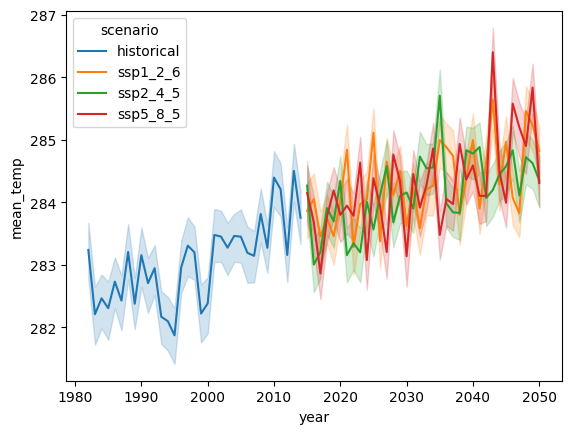

In [22]:
sns.lineplot(data=weather_yearly, x="year", y="mean_temp", hue="scenario")


In [23]:
weather_yearly.info()

<class 'pandas.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scenario       12549 non-null  str    
 1   nom_dep        12549 non-null  str    
 2   code_dep       12549 non-null  str    
 3   year           12549 non-null  int32  
 4   mean_temp      12549 non-null  float32
 5   std_temp       12549 non-null  float32
 6   mean_max_temp  12261 non-null  float32
 7   std_max_temp   12261 non-null  float32
 8   total_precip   12549 non-null  float32
 9   std_precip     12261 non-null  float32
dtypes: float32(6), int32(1), str(3)
memory usage: 878.6 KB


In [24]:
weather_yearly.to_csv("../data/weather_agg.csv", index=False)